In [1]:
import os
import cv2
import numpy as np
import skimage.transform
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
train_dir = 'dataset/asl_alphabet_train/asl_alphabet_train/'
image_size = 64
train_len = 87000

In [3]:
def get_data(folder):
    X = np.empty((train_len, image_size, image_size, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int)
    cnt = 0
    
    label_mapping = {
        'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9,
        'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18,
        'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27,
        'space': 28
    }
    
    default_label = 29
    
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            label = label_mapping.get(folderName, default_label)
            
            for image_filename in os.listdir(os.path.join(folder, folderName)):
                img_file = cv2.imread(os.path.join(folder, folderName, image_filename))
                
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (image_size, image_size, 3))
                    img_arr = np.asarray(img_file).reshape((-1, image_size, image_size, 3))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    
    return X, y

In [4]:
X_train, y_train = get_data(train_dir)

C:\Users\HP\AppData\Local\Temp\ipykernel_6028\1369246749.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.empty((train_len,), dtype=np.int)


In [5]:
image_size = image_size  # Assuming imageSize is already defined
print("Images successfully imported. Total images:", len(X_train))

Images successfully imported. Total images: 87000


In [6]:
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)

X_train shape :  (87000, 64, 64, 3)
y_train shape :  (87000,)


In [7]:
unique_shapes = set()
for image in X_train:
    shape = image.shape
    unique_shapes.add(shape)

print("Unique image shapes in X_train:", unique_shapes)

Unique image shapes in X_train: {(64, 64, 3)}


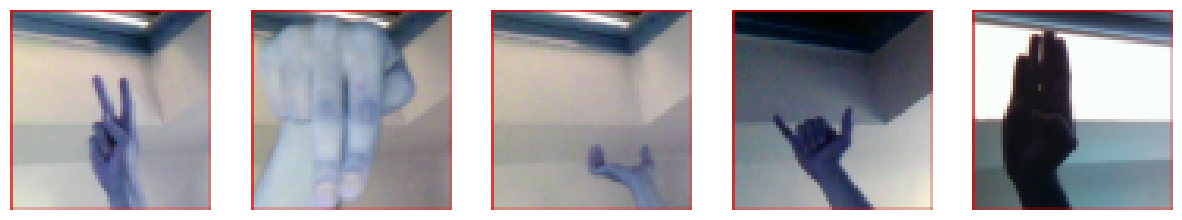

In [8]:
import matplotlib.pyplot as plt

num_images_to_display = 5

# Generate random indices to select images
random_indices = np.random.choice(len(X_train), size=num_images_to_display, replace=False)

# Plot the selected images
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

for i, index in enumerate(random_indices):
    image = X_train[index]
    axes[i].imshow(image)
    axes[i].axis('off')

plt.show()

In [9]:
X_data = X_train
y_data = y_train

print("Copies of X_train and y_train have been created.")

Copies of X_train and y_train have been created.


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42,stratify=y_data)

In [11]:
num_classes = 29

In [12]:
from tensorflow.keras.utils import to_categorical

# Apply one-hot encoding to y_train
y_cat_train = to_categorical(y_train, num_classes)

# Apply one-hot encoding to y_test
y_cat_test = to_categorical(y_test, num_classes)

In [13]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

print("\nShape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

print("\nShape of X_test:", y_cat_train.shape)
print("Shape of y_test:", y_cat_test.shape)

print("\nShape of X_data:", X_data.shape)
print("Shape of y_data:", y_data.shape)

Shape of X_train: (60900, 64, 64, 3)
Shape of y_train: (60900,)

Shape of X_test: (26100, 64, 64, 3)
Shape of y_test: (26100,)

Shape of X_test: (60900, 29)
Shape of y_test: (26100, 29)

Shape of X_data: (87000, 64, 64, 3)
Shape of y_data: (87000,)


In [14]:
import gc

# Delete variables from memory
del X_data
del y_data

# Trigger garbage collector
gc.collect()

24